**MNIST Handwritten Digit Clasification**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
# from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [3]:
type(X_train)

numpy.ndarray

In [4]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image dimension  --> 28 x 28

Grayscale Image  --> 1 channel

In [5]:
# printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


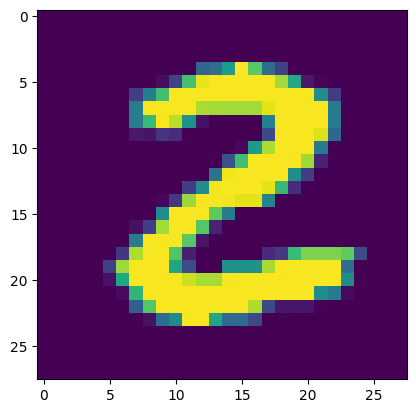

2


In [7]:
# displaying the image

plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

In [8]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [9]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

In [10]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [11]:
# printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [12]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [13]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2959 - accuracy: 0.9136
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1310 - accuracy: 0.9609
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0960 - accuracy: 0.9703
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0767 - accuracy: 0.9760
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0642 - accuracy: 0.9802
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0536 - accuracy: 0.9834
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0476 - accuracy: 0.9852
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0413 - accuracy: 0.9869
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0367 - accuracy: 0.9879
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.032

Training data accuracy = 98.9%

**Accuracy on Test data:**

In [15]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.1060 - accuracy: 0.9727
0.9726999998092651


Test data accuracy = 97.1%

In [16]:
print(X_test.shape)

(10000, 28, 28)


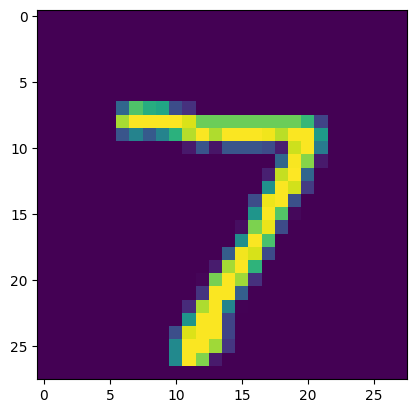

In [17]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [18]:
print(Y_test[0])

7


In [19]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [20]:
print(Y_pred.shape)

(10000, 10)


In [21]:
print(Y_pred[0])

[5.4969342e-04 3.4366745e-01 1.4336134e-01 5.1942205e-01 2.1218619e-04
 8.6125910e-02 4.5586524e-11 9.9999917e-01 1.5047990e-03 4.8154625e-01]


model.predict() gives the prediction probability of each class for that data point

In [22]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [23]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 9, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 9, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test  -->  True labels

Y_pred_labels  -->  Predicted Labels

Confusin Matrix

In [24]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [25]:
print(conf_mat)

tf.Tensor(
[[ 962    1    1    2    1    7    3    0    3    0]
 [   0 1122    3    4    0    0    0    0    6    0]
 [   2    2 1005    5    4    0    3    6    5    0]
 [   1    1    1  981    0   17    0    6    3    0]
 [   0    0    3    0  951    1    4    4    0   19]
 [   0    1    0    9    0  876    1    1    2    2]
 [   3    3    2    1    8   13  924    0    4    0]
 [   1    9   10    3    1    0    0  989    7    8]
 [   3    0    2    4    3   12    2    4  937    7]
 [   0    3    0    5    7    5    1    5    3  980]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

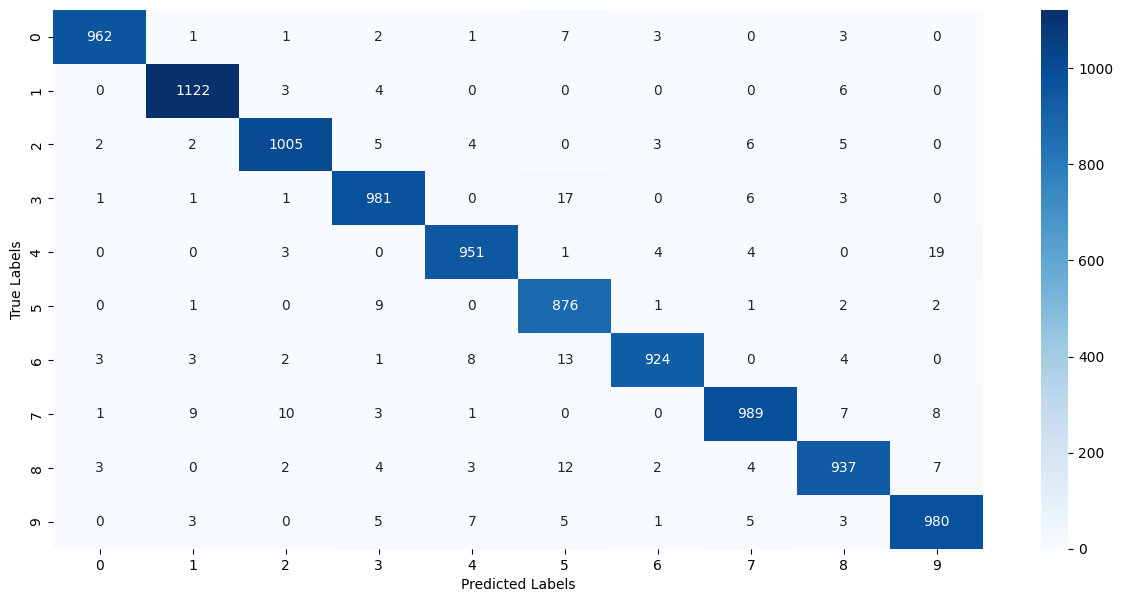

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive System

In [27]:
input_image_path = 'digit 7.png'

input_image = cv2.imread(input_image_path)

In [28]:
type(input_image)

numpy.ndarray

In [29]:
print(input_image)

[[[143 143 143]
  [110 110 110]
  [113 113 113]
  ...
  [113 113 113]
  [ 95  95  95]
  [195 195 195]]

 [[110 110 110]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [182 182 182]]

 [[113 113 113]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [185 185 185]]

 ...

 [[113 113 113]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [185 185 185]]

 [[113 113 113]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [185 185 185]]

 [[113 113 113]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [185 185 185]]]


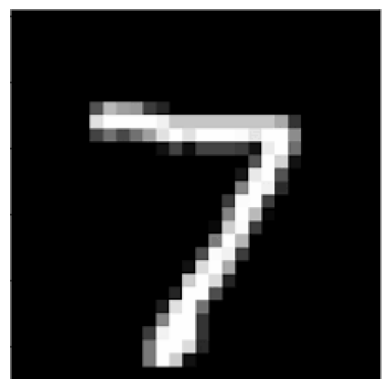

In [30]:
# cv2_imshow(input_image) # method 1 

# method 2
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(input_image_rgb)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()
# Replace 'your_image_path.jpg' with the path to your image file. This code will display the image in your Jupyter Notebook environment using Matplotlib.

In [31]:
input_image.shape

(224, 225, 3)

In [32]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [33]:
grayscale.shape

(224, 225)

In [34]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [35]:
input_image_resize.shape

(28, 28)

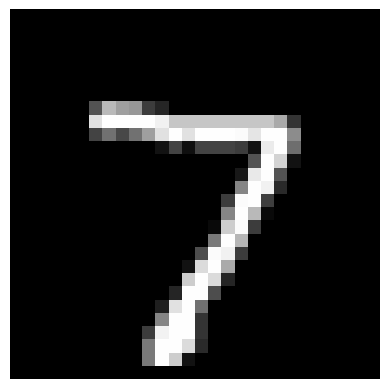

In [36]:
# cv2.imshow(input_image_resize)
input_image_r = cv2.cvtColor(input_image_resize, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(input_image_r)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

In [37]:
input_image_resize = input_image_resize/255

In [38]:
type(input_image_resize)

numpy.ndarray

In [39]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [40]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 24ms/step
[[5.5375294e-04 3.5510659e-01 1.4001210e-01 5.2170020e-01 2.3711089e-04
  7.9434760e-02 4.5441463e-11 9.9999923e-01 1.4683421e-03 4.9554729e-01]]


In [41]:
input_pred_label = np.argmax(input_prediction)

In [42]:
print(input_pred_label)

7


**Predictive System**

Path of the image to be predicted:  MNIST_digit.png


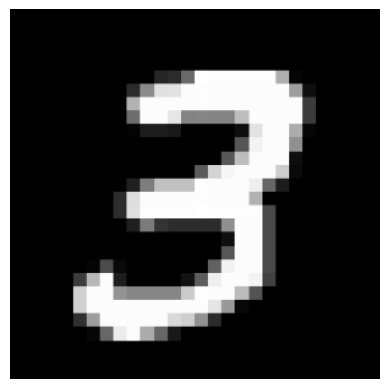

1/1 [==============================] - 0s 16ms/step
The Handwritten Digit is recognised as  3


In [43]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

# cv2_imshow(input_image)

input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
# Display the image using Matplotlib
plt.imshow(input_image_rgb)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)